##  Predicting  the  quality of wine through suitable algorithms

## IMPORT Libraries

In [1]:
import numpy as np                        # Numpy: Package for scientific computing with Python
import pandas as pd
import matplotlib.pyplot as plt          # matplotlib and seaborn libraries for visualization
import seaborn as sns 
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Reading the data of QualityPrediction

In [2]:
winedf=pd.read_csv("QualityPrediction.csv")       
winedf

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

## Columns of the data

In [3]:
winedf.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

##  descriptive statistics summary of a given dataframe.

In [4]:
winedf.describe() 

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [5]:
winedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## checking null values 

In [6]:
winedf.isnull().sum()         #  No null values 
                        #  No missing data

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### No Null Values in the dataset

## to check duplicate rows and calculate it's sum

In [5]:
duplicate_rows = winedf.duplicated()
print(f"Number of Duplicated rows is {duplicate_rows.sum()}")

Number of Duplicated rows is 240


## To drop Duplicate rows

In [7]:
winedf.drop_duplicates(keep='first',inplace=True)   #If keep=‘first‘, it considers first value as unique
                                                # and rest of the same values as duplicate.
                                                # inplace changes in data intact

## To check new shape of the dataset

In [6]:
print(f"shape of the data after deleting duplicated rows is {winedf.shape}")     # Now dataset after dropping duplicated rows has !359rows and 12 columns

shape of the data after deleting duplicated rows is (1359, 12)


## Correlation Matrix

#### correlation tell us the strangth and direction of the relationship between pair of variables.

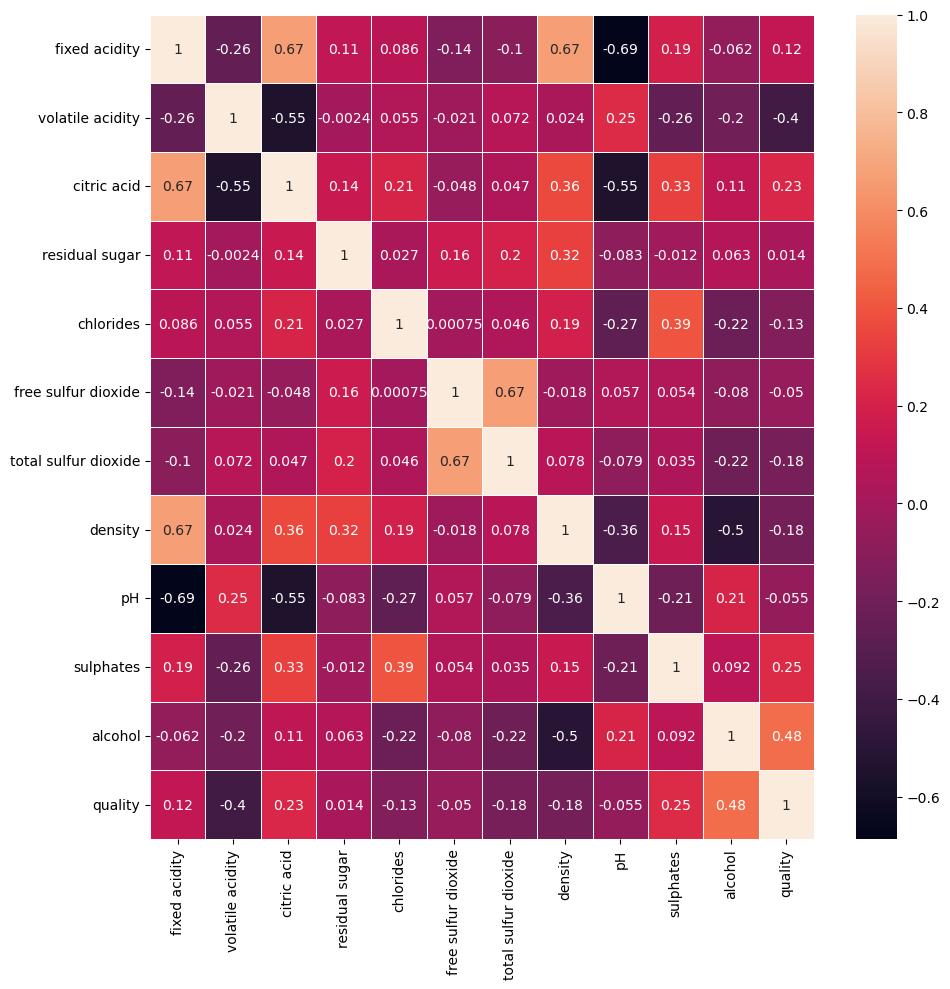

In [10]:
plt.figure(figsize=(10,10),dpi=100)
sns.heatmap(winedf.corr(),annot=True,linewidth=.5)               # heatmap compares the relayionship
plt.tight_layout()
plt.show()

#### In heatmap, it is clear that quality and alcohol has highest positive correlation.similarly, quality and volatile acidity  has high value of negative correlation

<Figure size 1000x500 with 0 Axes>

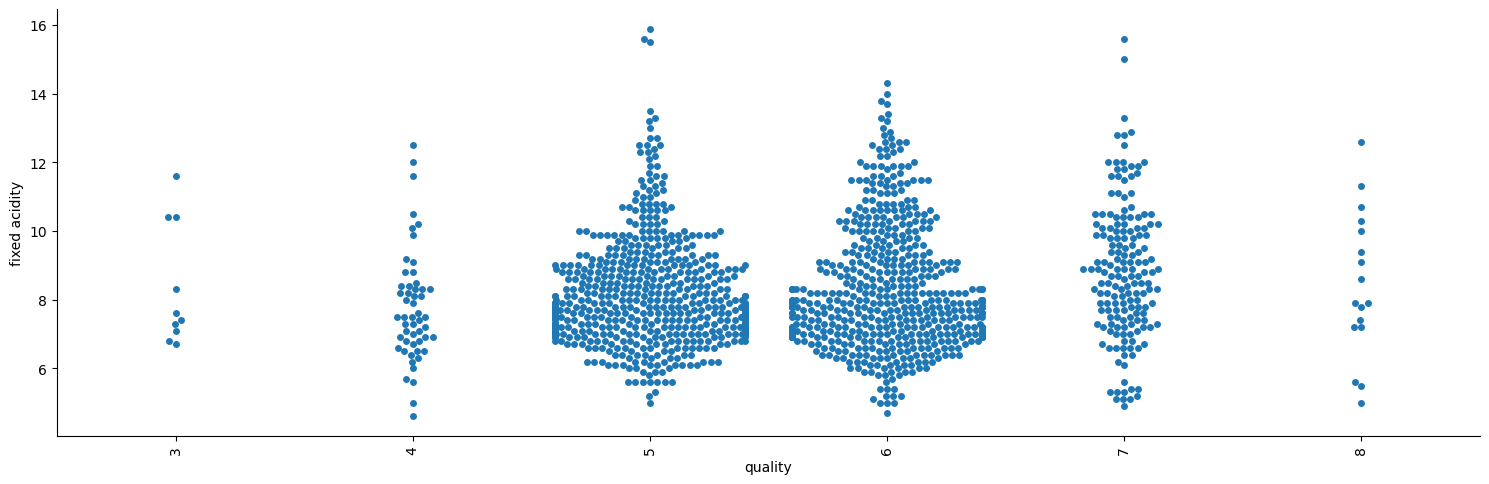

In [72]:
plt.figure(figsize=(10,5))
sns.catplot(data=winedf,y='fixed acidity',x='quality',kind='swarm',aspect=3)
plt.xticks(rotation=90)
plt.show()

#### fixed acidity has less effect on quality 

In [101]:
winedf

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
5         9.4        5  
...       ...      ...  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1597     10.2        5  
1598     11.0        6  

[1359 rows x 12 columns]

## Univariate Analysis

#### plotting distribution plot for various variables

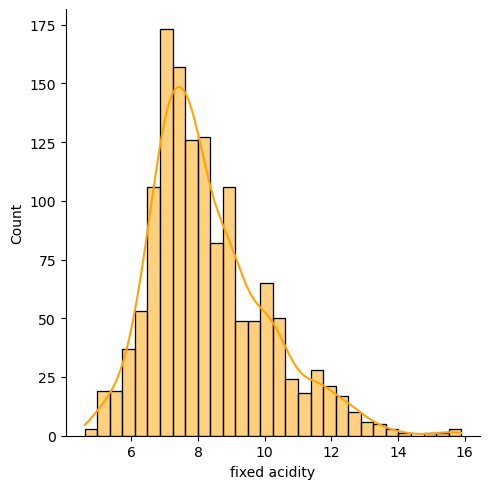

In [69]:
sns.displot(x=winedf['fixed acidity'],color='Orange',kde=True)

<Axes: ylabel='Density'>

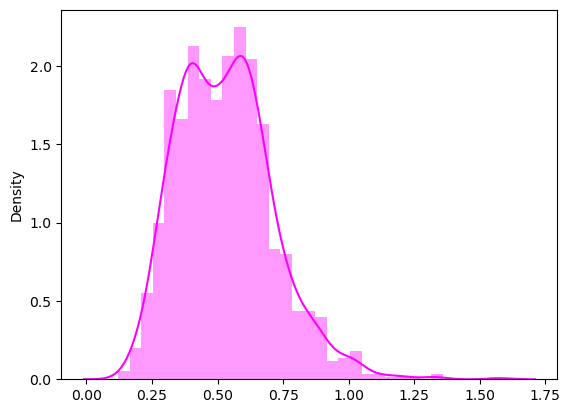

In [6]:
sns.distplot(x=winedf['volatile acidity'],color='magenta',kde=True)

### volatile acidity is not normally distributed 

<Axes: ylabel='Density'>

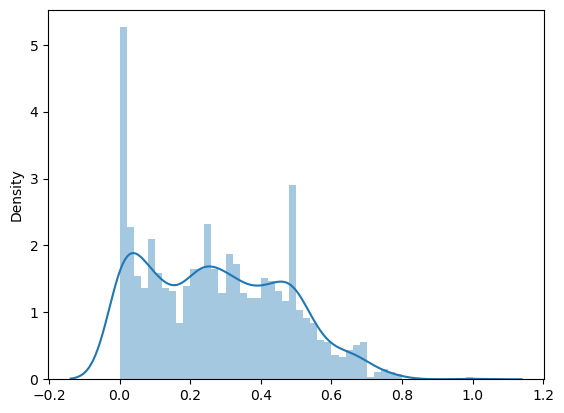

In [16]:
sns.distplot(x=winedf['citric acid'],kde=True,bins=50)

###  citric acid  is not normally distributed

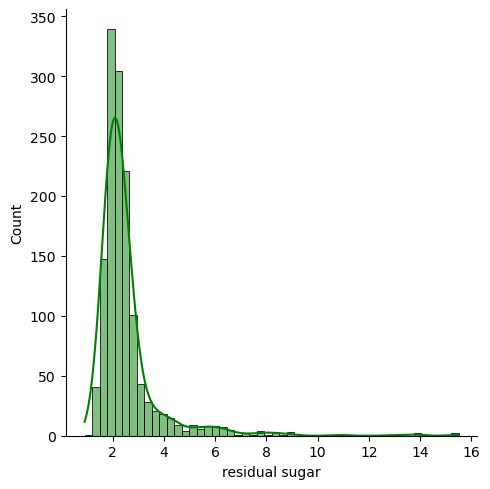

In [15]:
sns.displot(x=winedf['residual sugar'],color='green',kde=True,bins=50)


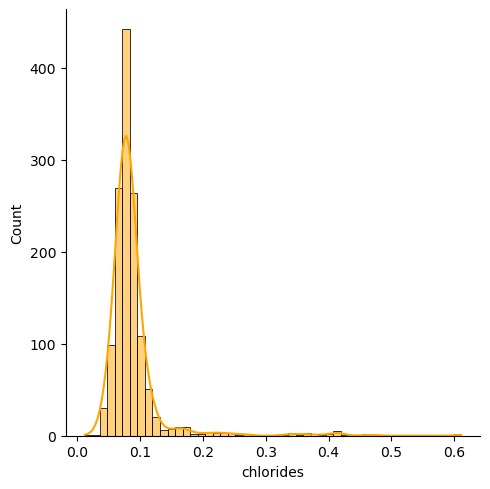

In [14]:
sns.displot(x=winedf['chlorides'],color='Orange',kde=True,bins=50)


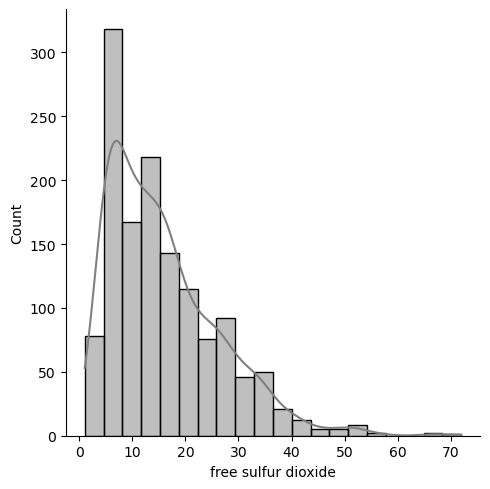

In [12]:
sns.displot(x=winedf['free sulfur dioxide'],color='grey',kde=True,bins=20)     # positive skew

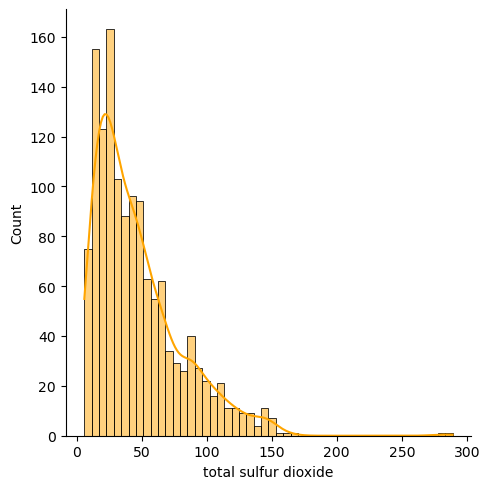

In [33]:
sns.displot(x=winedf['total sulfur dioxide'],color='Orange',kde=True,bins=50)


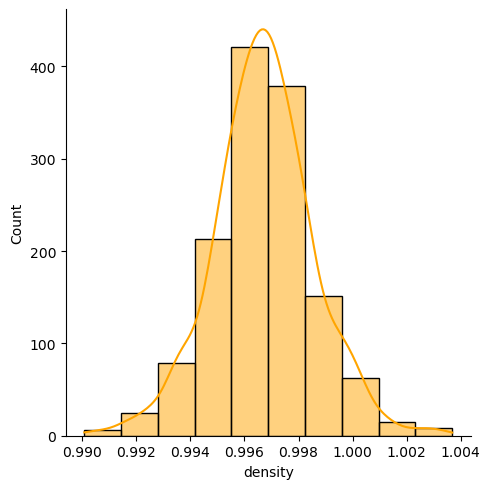

In [34]:
sns.displot(x=winedf['density'],color='Orange',kde=True,bins=10)

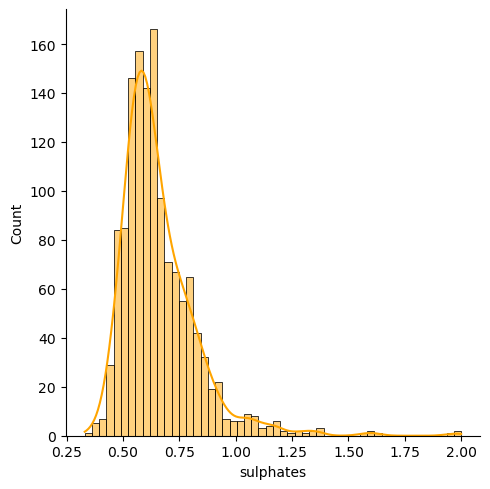

In [17]:
sns.displot(x=winedf['sulphates'],color='Orange',kde=True)

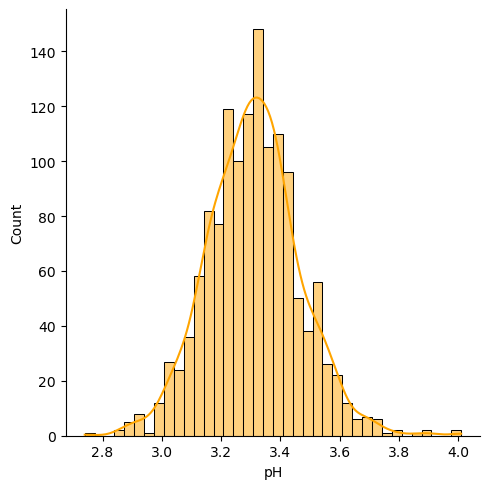

In [7]:
sns.displot(x=winedf['pH'],color='Orange',kde=True)


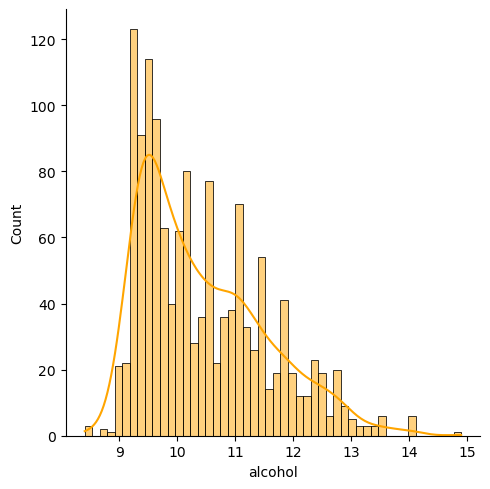

In [18]:
sns.displot(x=winedf['alcohol'],color='Orange',kde=True,bins=50)

### positively skew

In [35]:
set(winedf['quality'])           # quality has 5 class 

{3, 4, 5, 6, 7, 8}

## Countplot of target Variable:quality               (after deleting duplicate rows)

<Axes: xlabel='quality', ylabel='count'>

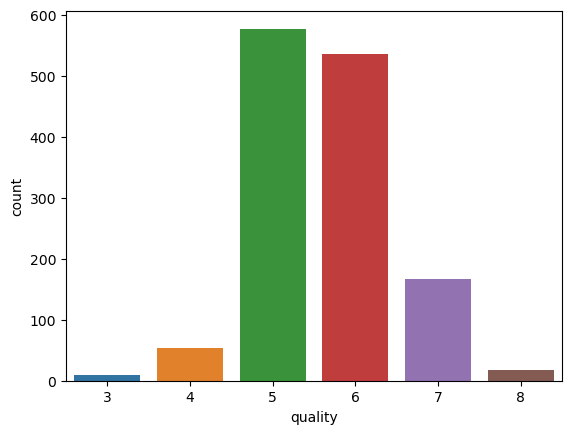

In [19]:
sns.countplot(data=winedf,x='quality')               # countplot for quality as it is discrete

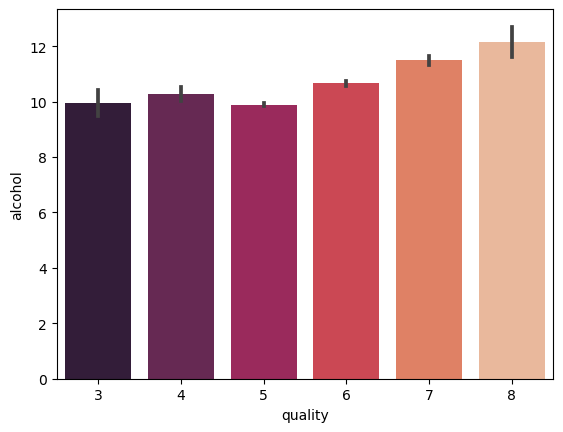

In [20]:
sns.barplot(data=winedf,y='alcohol',x='quality',palette='rocket')
plt.show()

### quality of wine increase in alcohol content

<Axes: xlabel='quality', ylabel='volatile acidity'>

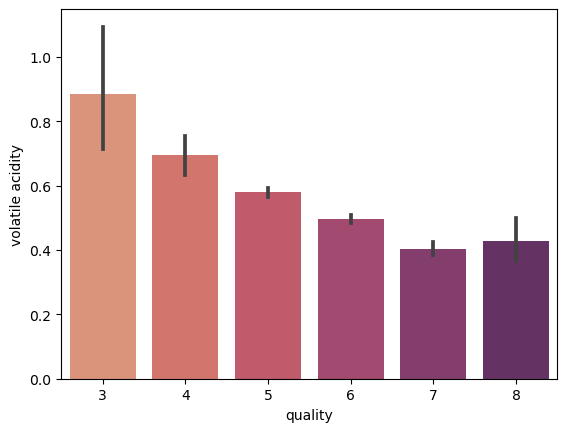

In [21]:
sns.barplot(data=winedf,x='quality',y='volatile acidity',palette='flare')

### high volatile acidity less quality , high quality less is volatile acidity 

## Multivariate Analysis

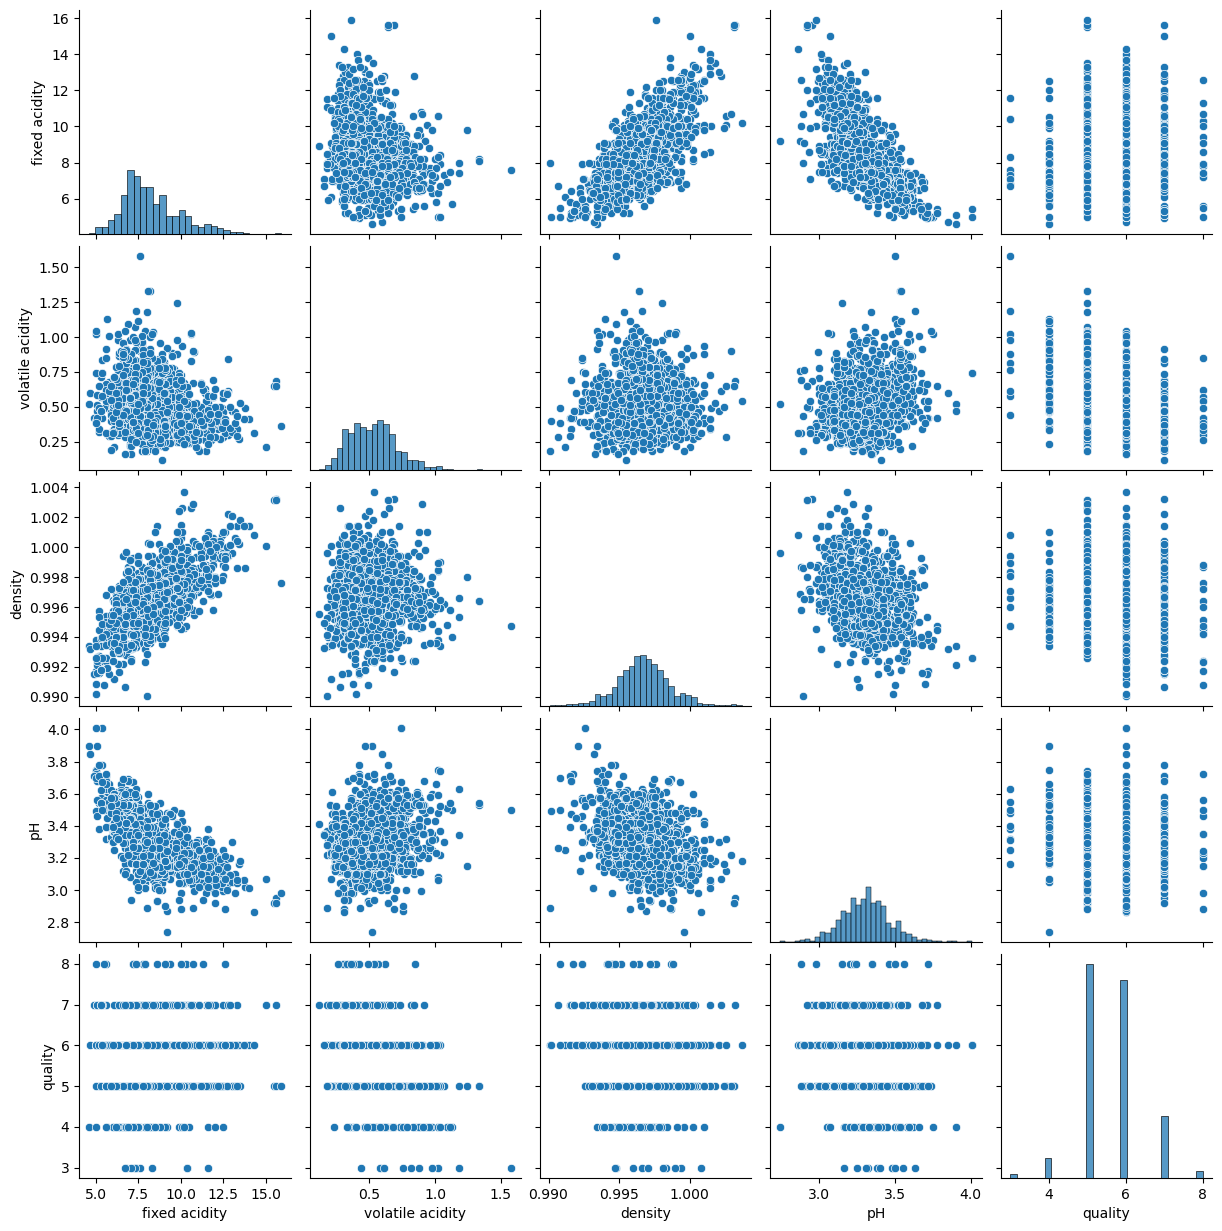

In [4]:
data=winedf[['fixed acidity','volatile acidity','density','pH','quality']]  # pairplots of fixed acidity ,'volatile acidity',
sns.pairplot(data)                                                      #              density ,pH, quality
plt.show()

### Positive correlationship between  fixed acidity and density can be seen (fixed acidity increases with increase in density).
### Negative correlationship between fixed acidity and pH.

pairplot helps to understand the mutual correlation between two variables

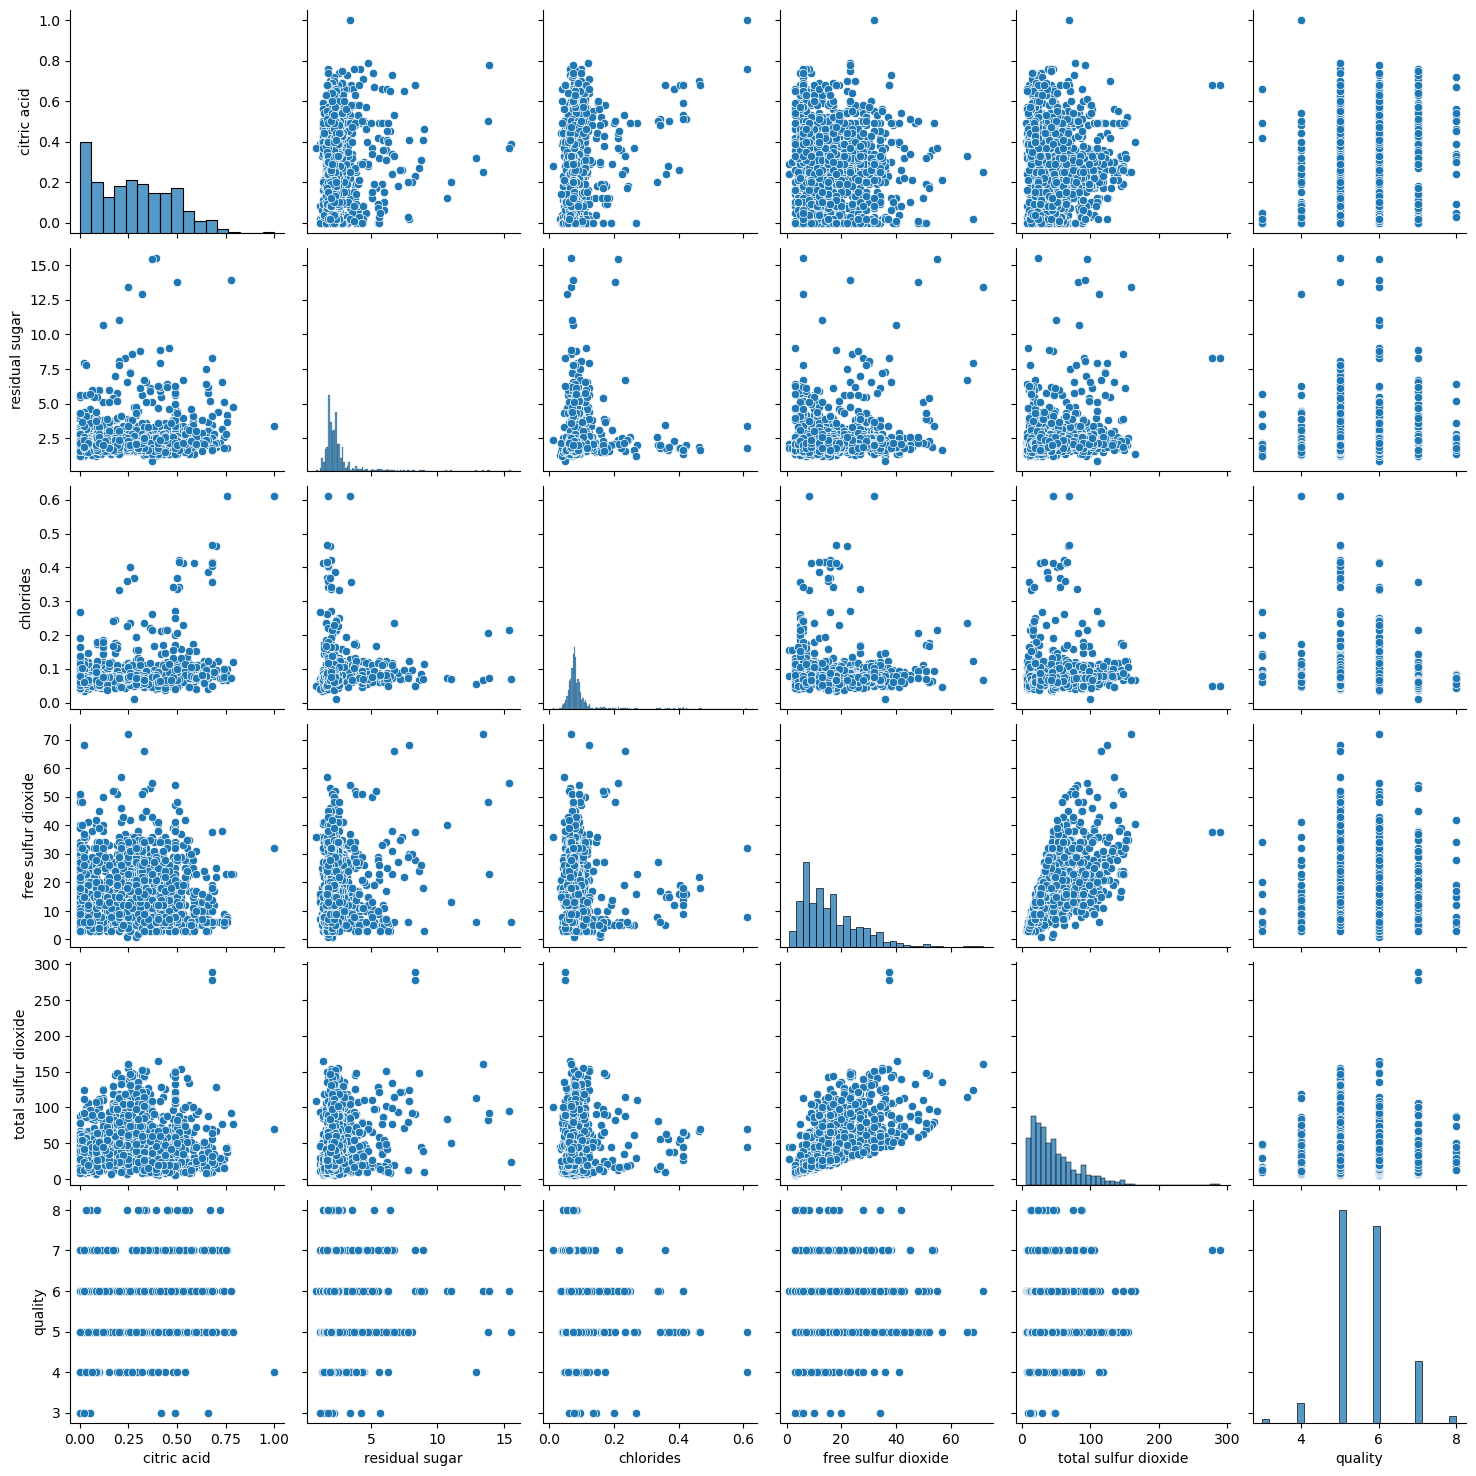

In [5]:
winedata=winedf[["citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide",'quality']]
sns.pairplot(winedata)                    # pairplot between citric acid, chlorides , free sulfur dioxide, total sulphur dioxide
plt.show()                            #                   quality 

<Axes: xlabel='quality', ylabel='count'>

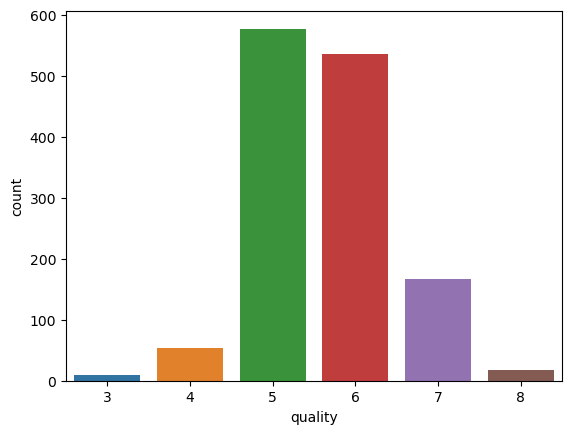

In [8]:
sns.countplot(data=winedf,x='quality')               # countplot for quality as it is discrete

In [9]:
winedf['quality'].value_counts()           # Value count of quality variable

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

## Donut chart of target variable 'quality' before outliers treatment

In [10]:
import plotly.graph_objects as go

labels=winedf['quality'].value_counts().index.tolist()
values = winedf['quality'].value_counts().values.tolist()

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])
fig

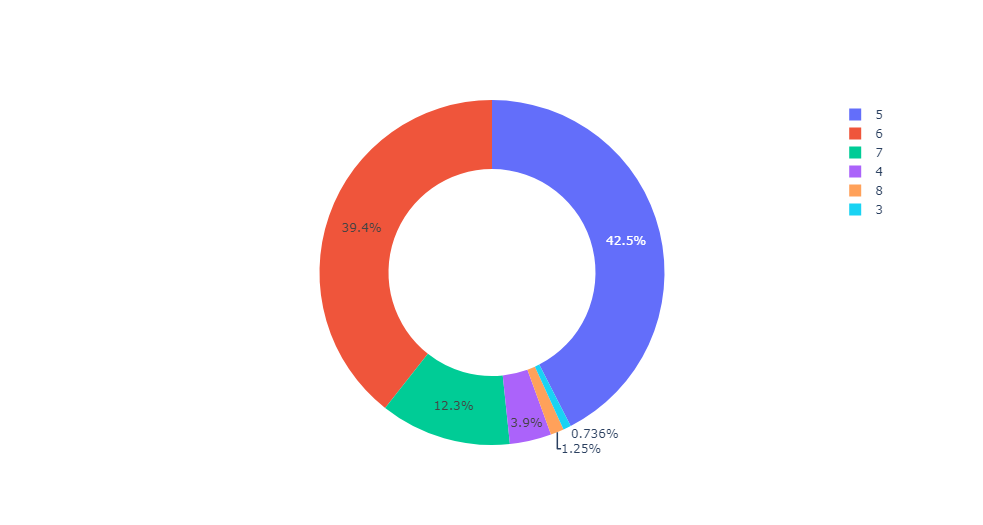

In [71]:
from PIL import Image
img = Image.open("newplot.png")
img

# Five Point Summmary      
## Minimum , First Quartile(Q1), Median,Third Quartile(Q3),Maximum

In [24]:
winedf.describe().loc[['min', '25%', '50%', '75%', 'max']]          

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
min            4.6              0.12         0.00             0.9      0.012   
25%            7.1              0.39         0.09             1.9      0.070   
50%            7.9              0.52         0.26             2.2      0.079   
75%            9.2              0.64         0.43             2.6      0.091   
max           15.9              1.58         1.00            15.5      0.611   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
min                  1.0                   6.0  0.99007  2.74       0.33   
25%                  7.0                  22.0  0.99560  3.21       0.55   
50%                 14.0                  38.0  0.99670  3.31       0.62   
75%                 21.0                  63.0  0.99782  3.40       0.73   
max                 72.0                 289.0  1.00369  4.01       2.00   

     alcohol  quality  
min      8.4      3.0  
25%      9.5      5.0  
50%     10.2      6.0  
75%     11.1      6.0  
max     14.9      8.0

# outliers detection and treatment

## Analysis of Outliers through Boxplots (Before Treatment)

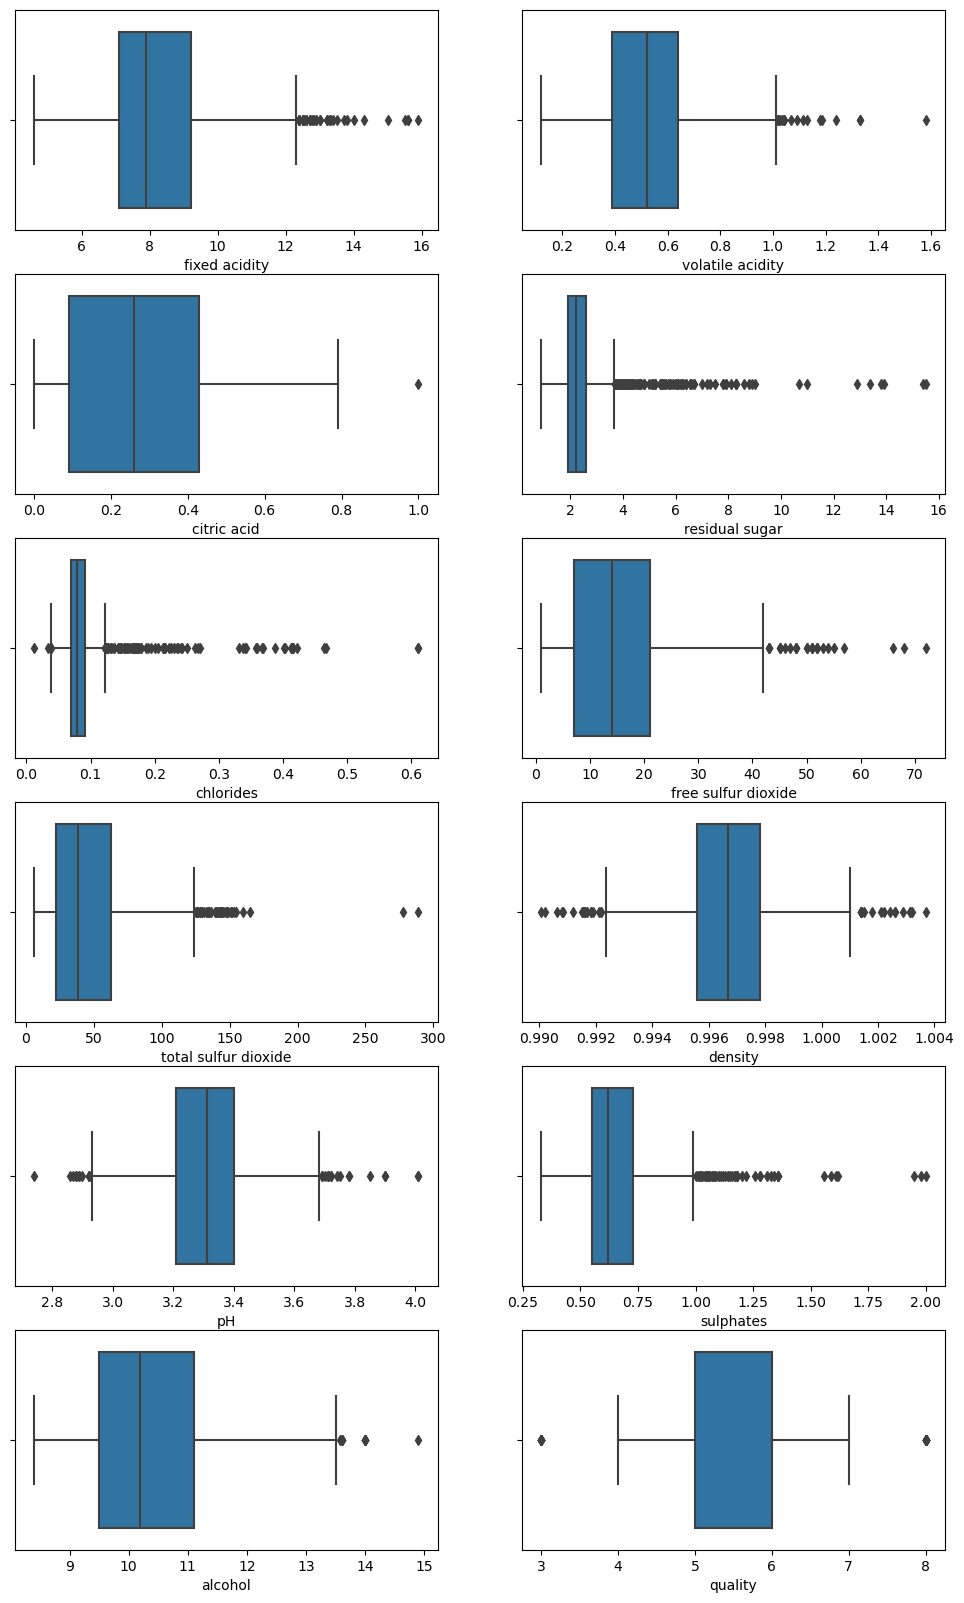

In [25]:
plt.figure(figsize=(12,20))
parameters=winedf.columns.tolist()
for i,parameters in enumerate(parameters):
    plt.subplot(6,2,i+1)
    sns.boxplot(data=winedf,x=parameters)
plt.show()

In [11]:
Q1 =winedf.describe().loc['25%']      # First Quartile i.e,25th Percentile
Q3 =winedf.describe().loc['75%']      # Third Quartile i.e, 75th percentile   
IQR = Q3 - Q1                      # InterQuartile Range

LL = Q1 - 1.5 * IQR                # Lower Limit
UL = Q3 + 1.5 * IQR                # Upper Limit


#### The IQR is preferred to the standard deviation when the distribution is very highly skewed or there are severe outliers, because the IQR is less sensitive to these features than standard Deviation or The median has the advantage that it is not affected by outliers 

## Interquartile Range

In [27]:
IQR

fixed acidity            2.10000
volatile acidity         0.25000
citric acid              0.34000
residual sugar           0.70000
chlorides                0.02100
free sulfur dioxide     14.00000
total sulfur dioxide    41.00000
density                  0.00222
pH                       0.19000
sulphates                0.18000
alcohol                  1.60000
quality                  1.00000
dtype: float64

## Removing the Outliers

In [12]:
winedata = winedf[~((winedf < (Q1-1.5*IQR)) | (winedf > (Q3+1.5*IQR))).any(axis=1)]     

In [13]:
winedata

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
5         9.4        5  
...       ...      ...  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1597     10.2        5  
1598     11.0        6  

[1005 rows x 12 columns]

In [11]:
print(f"new shape of the data:{winedata.shape}")

new shape of the data:(1005, 12)


## Analysis of Outliers through Boxplots (after treatment)  

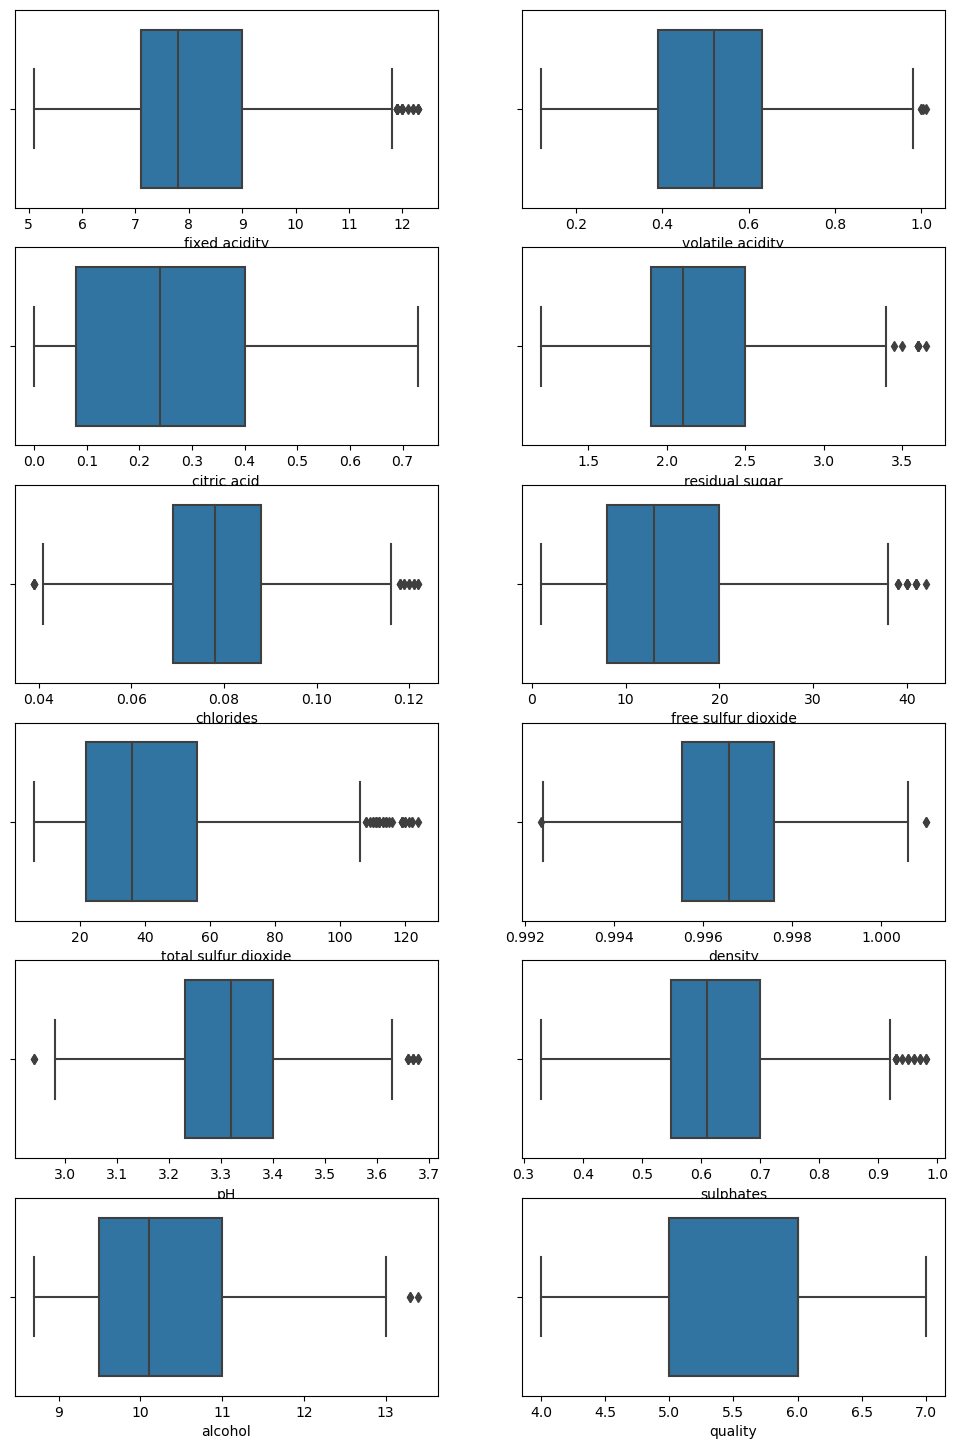

In [13]:
plt.figure(figsize=(12,18))
parameters=winedata.columns.tolist()
for i,parameters in enumerate(parameters):
    plt.subplot(6,2,i+1)
    sns.boxplot(data=winedata,x=parameters)
plt.show()

<Axes: xlabel='quality', ylabel='count'>

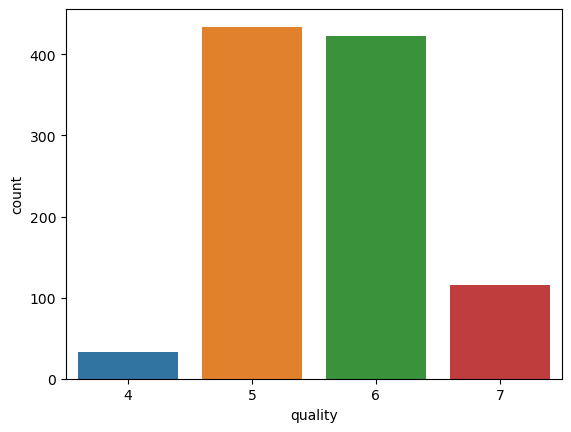

In [12]:
sns.countplot(data=winedata,x='quality')               # countplot for quality as it is discrete

In [16]:
winedata['quality'].value_counts().index.tolist()

[5, 6, 7, 4]

In [14]:
winedata['quality'].value_counts()

5    434
6    423
7    115
4     33
Name: quality, dtype: int64

## DoNut chart of target variable (quality) after removing duplicate rows and outliers

In [15]:
import plotly.graph_objects as go

labels=winedata['quality'].value_counts().index.tolist()
values = winedata['quality'].value_counts().values.tolist()

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])
fig.show()

In [69]:
from PIL import Image
img1 = Image.open("newplot1.png")
img1.show()

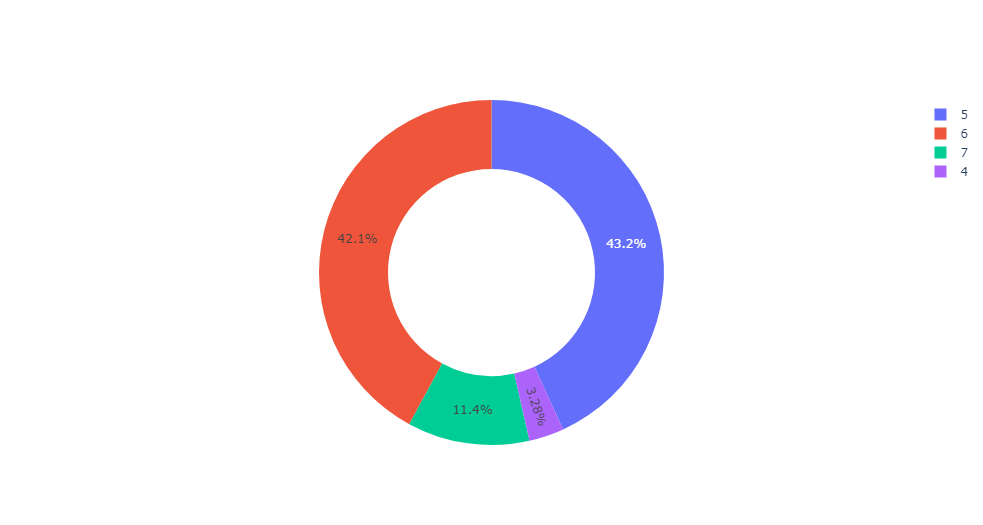

In [70]:
img1

### Less data regarding quality values 3, 4 ,8

# Method1:Logistic Regression

### creating another column called 'quality_label'

In [17]:
winedata['quality_label']=np.where(winedata['quality']>=6,'Good','Bad')            # qualitative variable
winedata

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality quality_label  
0         9.4        5           Bad  
1         9.8        5           Bad  
2         9.8        5           Bad  
3         9.8        6          Good  
5         9.4        5           Bad  
...       ...      ...           ...  
1593      9.5        6          Good  
1594     10.5        5           Bad  
1595     11.2        6          Good  
1597     10.2        5           Bad  
1598     11.0        6          Good  

[1005 rows x 13 columns]

In [8]:
winedata['quality_label']

0        Bad
1        Bad
2        Bad
3       Good
5        Bad
        ... 
1593    Good
1594     Bad
1595    Good
1597     Bad
1598    Good
Name: quality_label, Length: 1005, dtype: object

In [11]:
winedata.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label'],
      dtype='object')

In [18]:
X=winedata.iloc[:,1:11].values
X

array([[ 0.7  ,  0.   ,  1.9  , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 0.88 ,  0.   ,  2.6  , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 0.76 ,  0.04 ,  2.3  , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 0.55 ,  0.1  ,  2.2  , ...,  3.52 ,  0.76 , 11.2  ],
       [ 0.645,  0.12 ,  2.   , ...,  3.57 ,  0.71 , 10.2  ],
       [ 0.31 ,  0.47 ,  3.6  , ...,  3.39 ,  0.66 , 11.   ]])

In [19]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder

# label_encoder object knows
# how to understand word labels.
label_encoder = LabelEncoder()

# Encode labels in column 'species'.
winedata['quality_label']= label_encoder.fit_transform(winedata['quality_label'])



In [20]:
Y=winedata['quality_label'].values
Y

array([0, 0, 0, ..., 1, 0, 1])

## Splitting Data for Training and Testing 

In [21]:
from sklearn.model_selection import train_test_split                   # import train_test_split from sklearn.model_selection library
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state = 100)

In [22]:
X_train                                              # X-train data

array([[ 0.29 ,  0.49 ,  2.6  , ...,  3.05 ,  0.74 , 10.5  ],
       [ 0.68 ,  0.07 ,  1.9  , ...,  3.38 ,  0.52 ,  9.5  ],
       [ 0.35 ,  0.24 ,  2.   , ...,  3.43 ,  0.54 , 10.   ],
       ...,
       [ 0.6  ,  0.29 ,  2.   , ...,  3.34 ,  0.57 , 10.   ],
       [ 0.69 ,  0.   ,  1.9  , ...,  3.35 ,  0.6  ,  9.7  ],
       [ 0.735,  0.02 ,  2.5  , ...,  3.51 ,  0.71 , 11.7  ]])

## Standardization of Dataset Using Standard Scaler

In [23]:
from sklearn.preprocessing import StandardScaler     # importing standard scaler from sklearn.preprocessin
Std_scaler = StandardScaler()                        # initiating
X_train=Std_scaler.fit_transform(X_train)            # fitting to know mean and standard deviation and transforms the data
X_test=Std_scaler.fit_transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [25]:
Y_pred=log_reg.predict(X_test)
Y_pred

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1])

In [26]:
Y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1])

## confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(Y_test,Y_pred)
conf_mat
#tn, fp, fn, tp (sklearn conf matrix)

array([[70, 25],
       [27, 79]], dtype=int64)

### Confusion Matrix through HeatMap

<Axes: >

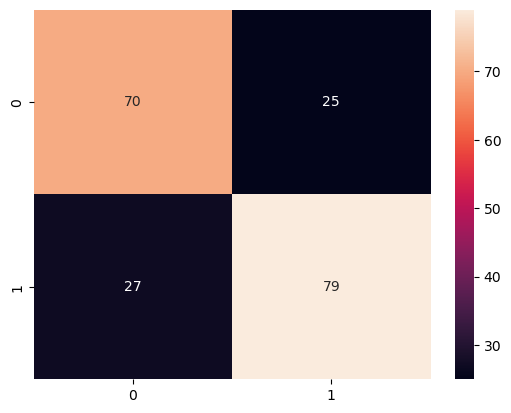

In [28]:
fig,ax=plt.subplots()
sns.heatmap(conf_mat ,annot=True,ax=ax )

### Accuracy (both Formula and  Code)

In [29]:
accuracy = (70+79)/len(Y_test)    
accuracy

0.7412935323383084

In [30]:
print("Accuracy: ", metrics.accuracy_score(Y_test,Y_pred))

Accuracy:  0.7412935323383084


### precision and Recall

In [31]:
print("Precision: ", metrics.precision_score(Y_test,Y_pred))

Precision:  0.7596153846153846


In [32]:
print("Recall: ", metrics.recall_score(Y_test,Y_pred))

Recall:  0.7452830188679245


## Plotting ROC(Receiver's Operating Characteristics Curve)

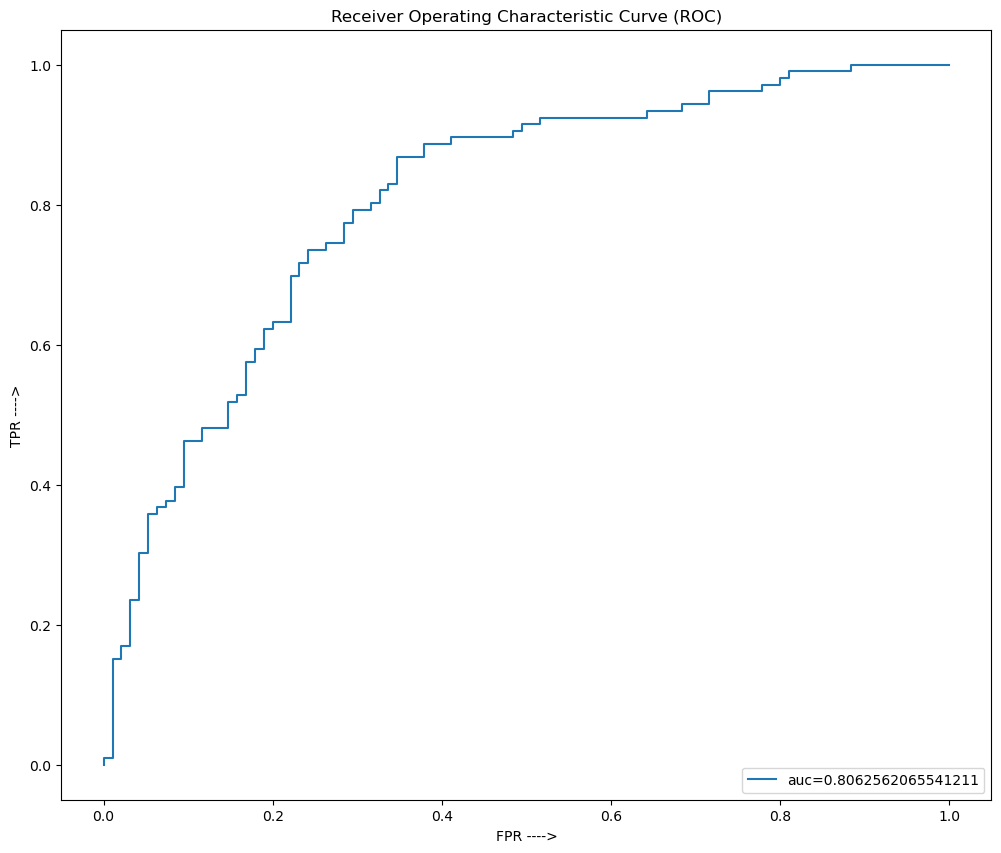

In [24]:
Y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

### precision Recall (PR)curve

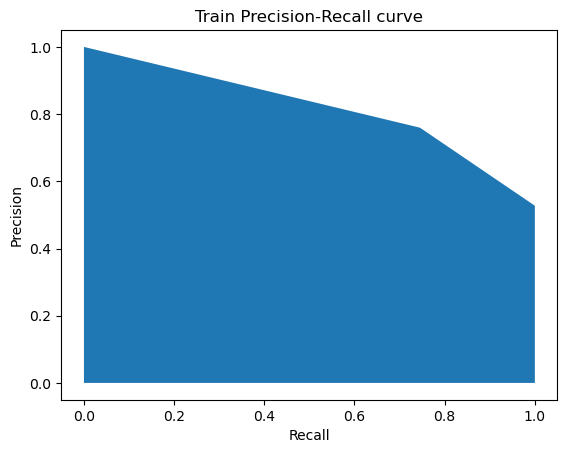

In [33]:
from sklearn.metrics import precision_recall_curve                   # import precison recall_curve through sklearn.metrics
precision, recall, thresholds = precision_recall_curve(Y_test,Y_pred)
plt.fill_between(recall, precision)
plt.ylabel("Precision")                                # Labelling X and Y 
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");             # title

In [34]:
from sklearn.metrics import f1_score         # importing f1_score from sklearn.metrics

F1 = 2 * (precision * recall) / (precision + recall)

In [35]:
f1_score(Y_test,Y_pred ,average='binary')

0.7523809523809523

In [36]:
FP = conf_mat[0,1]
FN = conf_mat[1,0]
TP = conf_mat[1,1]
TN = conf_mat[0,0]

In [37]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
TPR

0.7452830188679245

In [38]:
# Specificity or true negative rate
TNR = TN/(TN+FP) 
TNR

0.7368421052631579

In [39]:
# Precision or positive predictive value
PPV = TP/(TP+FP)
PPV

0.7596153846153846

In [40]:
# Negative predictive value
NPV = TN/(TN+FN)
NPV

0.7216494845360825

In [41]:
# Fall out or false positive rate
FPR = FP/(FP+TN)
FPR

0.2631578947368421

In [42]:
# False negative rate
FNR = FN/(TP+FN)
FNR

0.25471698113207547

In [43]:
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
ACC

0.7412935323383084

# Method 2: Multinomial Logistic Regression

In [44]:
winedata.drop(columns='quality_label',inplace=True)                    # Here we are taking quality column as target variable ,
winedata1=winedata                                                         # so deleting inserted quality label column
winedata1

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
5         9.4        5  
...       ...      ...  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1597     10.2        5  
1598     11.0        6  

[1005 rows x 12 columns]

In [45]:
X=winedata1.iloc[:,1:11].values            # independent variables values
X

array([[ 0.7  ,  0.   ,  1.9  , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 0.88 ,  0.   ,  2.6  , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 0.76 ,  0.04 ,  2.3  , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 0.55 ,  0.1  ,  2.2  , ...,  3.52 ,  0.76 , 11.2  ],
       [ 0.645,  0.12 ,  2.   , ...,  3.57 ,  0.71 , 10.2  ],
       [ 0.31 ,  0.47 ,  3.6  , ...,  3.39 ,  0.66 , 11.   ]])

In [46]:
Y=winedata1['quality'].values    # Target Variable
Y

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

## Splitting the dataset for training and testing

In [47]:
from sklearn.model_selection import train_test_split                   # import train_test_split from sklearn.model_selection library
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state = 100)  # splitting in the ratio 80:20 the dataset into train dataset and test dataset

In [48]:
from sklearn.preprocessing import StandardScaler     # importing standard scaler from sklearn.preprocessin
Std_scaler = StandardScaler()                        # initiating
X_train=Std_scaler.fit_transform(X_train)            # fitting to know mean and standard deviation and transforms the data
X_test=Std_scaler.fit_transform(X_test)

In [49]:
from sklearn.linear_model import LogisticRegression                    # import 
log_reg=LogisticRegression(multi_class='multinomial',solver='saga')    # initialization
log_reg.fit(X_train,Y_train)                                           # fitting the train data 

LogisticRegression(multi_class='multinomial', solver='saga')

In [50]:
Y_pred=log_reg.predict(X_test)            # Predicting the output through test dataset
Y_pred

array([5, 5, 6, 5, 5, 5, 6, 7, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 7,
       6, 5, 5, 5, 6, 5, 6, 7, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 7,
       6, 6, 6, 5, 6, 5, 5, 5, 5, 7, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 7, 6, 7, 6, 5, 5, 6, 6,
       5, 6, 5, 5, 7, 5, 5, 7, 7, 5, 6, 5, 6, 6, 6, 5, 5, 7, 6, 5, 5, 5,
       5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6,
       5, 4, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6,
       6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6,
       6, 5, 7, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 7, 5, 5,
       5, 6, 7], dtype=int64)

In [51]:
Y_test

array([5, 5, 4, 5, 4, 5, 5, 5, 6, 5, 6, 6, 4, 7, 6, 5, 6, 7, 6, 6, 6, 6,
       6, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 7, 6, 6, 5, 6, 5, 5, 4, 6, 6, 7,
       6, 7, 6, 5, 5, 6, 5, 6, 5, 7, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6,
       5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 7, 5, 6, 5, 6, 5, 7, 6,
       6, 6, 5, 5, 7, 4, 5, 6, 6, 5, 7, 5, 5, 6, 6, 5, 5, 7, 6, 5, 5, 5,
       5, 7, 5, 6, 7, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 7, 5, 7, 4, 6, 6, 6,
       6, 4, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 4, 6, 5, 6, 7, 6, 5, 6, 6,
       6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 4, 6, 7, 6, 6, 5, 5, 6, 5, 6, 5, 5,
       7, 5, 7, 5, 5, 5, 6, 7, 6, 5, 6, 5, 5, 6, 7, 5, 7, 4, 6, 7, 5, 5,
       5, 5, 7], dtype=int64)

## Confusion Matrix

In [52]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(Y_test,Y_pred)
conf_mat
#tn, fp, fn, tp (sklearn conf matrix)

array([[ 1,  8,  1,  0],
       [ 0, 61, 23,  1],
       [ 0, 27, 50,  5],
       [ 0,  1, 15,  8]], dtype=int64)

## HeatMap of Confusion Matrix

<Axes: >

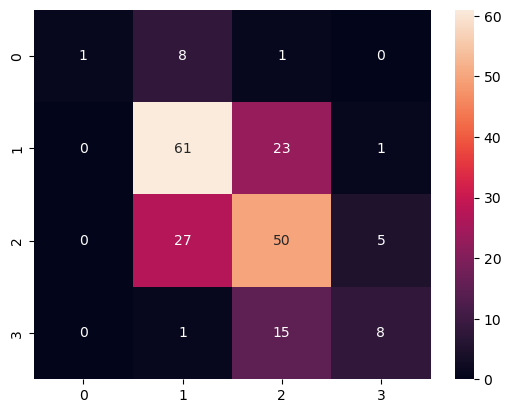

In [53]:
fig,ax=plt.subplots()
sns.heatmap(conf_mat ,annot=True,ax=ax )

## Accuracy of Multinomial logistic regression

In [54]:
print("Accuracy: ", metrics.accuracy_score(Y_test,Y_pred))

Accuracy:  0.5970149253731343


## Classification Report 

In [18]:
from sklearn.metrics import classification_report

print(f"R:{classification_report(Y_test,Y_pred)}")

R:              precision    recall  f1-score   support

           4       1.00      0.10      0.18        10
           5       0.63      0.72      0.67        85
           6       0.56      0.61      0.58        82
           7       0.57      0.33      0.42        24

    accuracy                           0.60       201
   macro avg       0.69      0.44      0.46       201
weighted avg       0.61      0.60      0.58       201



## Conclusion  : Mutlinomial Logistic Regression gives low accuracy , so it is not suitable for this data  . As we have less and inadequate data of quality count 3,4,8

# Method 3: Decision Tree 

In [55]:
winedata.iloc[:,1:11]

volatile acidity  citric acid  residual sugar  chlorides  \
0                0.700         0.00             1.9      0.076   
1                0.880         0.00             2.6      0.098   
2                0.760         0.04             2.3      0.092   
3                0.280         0.56             1.9      0.075   
5                0.660         0.00             1.8      0.075   
...                ...          ...             ...        ...   
1593             0.620         0.08             1.9      0.068   
1594             0.600         0.08             2.0      0.090   
1595             0.550         0.10             2.2      0.062   
1597             0.645         0.12             2.0      0.075   
1598             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
5         9.4  
...       ...  
1593      9.5  
1594     10.5  
1595     11.2  
1597     10.2  
1598     11.0  

[1005 rows x 10 columns]

In [56]:
X=winedata.iloc[:,1:11].values
X

array([[ 0.7  ,  0.   ,  1.9  , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 0.88 ,  0.   ,  2.6  , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 0.76 ,  0.04 ,  2.3  , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 0.55 ,  0.1  ,  2.2  , ...,  3.52 ,  0.76 , 11.2  ],
       [ 0.645,  0.12 ,  2.   , ...,  3.57 ,  0.71 , 10.2  ],
       [ 0.31 ,  0.47 ,  3.6  , ...,  3.39 ,  0.66 , 11.   ]])

In [37]:
Y=winedata[['quality_label']].values.ravel()
Y

array([0, 0, 0, ..., 1, 0, 1])

## Splitting the dataset for train and test

In [57]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y ,test_size=0.2,random_state=12)

## Decision Tree with Cart(Gini)

In [58]:
# Decision Tree with depth 2

from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier(random_state=1,max_depth=2)

model_2.fit(X_train,Y_train)

model_2_score_train = model_2.score(X_train,Y_train)

model_2_score_test = model_2.score(X_test,Y_test)

print('Training Score',model_2_score_train)

print('Testing Score',model_2_score_test)

Training Score 0.5808457711442786
Testing Score 0.5771144278606966


In [59]:
# Decision Tree with depth 10

from sklearn.tree import DecisionTreeClassifier

model10 = DecisionTreeClassifier(random_state=1,max_depth=10)

model10.fit(X_train,Y_train)

model10_score_train = model10.score(X_train,Y_train)

model10_score_test = model10.score(X_test,Y_test)

print('Training Score',model10_score_train)

print('Testing Score',model10_score_test)

Training Score 0.9191542288557214
Testing Score 0.5422885572139303


Clear case of Overfitting

## Decision Tree with Entropy as splitting criteria

In [60]:
model_dt = DecisionTreeClassifier(max_depth=8,criterion='entropy')

model_dt.fit(X_train,Y_train)

Y_pred_dt = model_dt.predict_proba(X_test)[:,1]
# y_pred_dt

model_dt_score_train = model_dt.score(X_train,Y_train)
print('training score',model_dt_score_train)

model_dt_score_test = model_dt.score(X_test,Y_test)
print('Testing Score',model_dt_score_test)

training score 0.8395522388059702
Testing Score 0.48258706467661694


## Decision Tree Models is  Overfitting

## Method 4: RANDOM FOREST 

In [67]:
winedata            # dataset

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  quality_label  
0         9.4        5              0  
1         9.8        5              0  
2         9.8        5              0  
3         9.8        6              1  
5         9.4        5              0  
...       ...      ...            ...  
1593      9.5        6              1  
1594     10.5        5              0  
1595     11.2        6              1  
1597     10.2        5              0  
1598     11.0        6              1  

[1005 rows x 13 columns]

In [42]:
X=winedata.iloc[:,1:11].values          # Independent variables
X

array([[ 0.7  ,  0.   ,  1.9  , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 0.88 ,  0.   ,  2.6  , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 0.76 ,  0.04 ,  2.3  , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 0.55 ,  0.1  ,  2.2  , ...,  3.52 ,  0.76 , 11.2  ],
       [ 0.645,  0.12 ,  2.   , ...,  3.57 ,  0.71 , 10.2  ],
       [ 0.31 ,  0.47 ,  3.6  , ...,  3.39 ,  0.66 , 11.   ]])

In [43]:
Y=winedata[['quality_label']].values.ravel()         # target variables values
Y

array([0, 0, 0, ..., 1, 0, 1])

## Splitting the data for train and test

In [44]:
from sklearn.model_selection import train_test_split                   # import train_test_split from sklearn.model_selection library
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state = 100)

### Standardization of the test, train dataset

In [45]:
from sklearn.preprocessing import StandardScaler     # importing standard scaler from sklearn.preprocessin
Std_scaler = StandardScaler()                        # initiating
X_train=Std_scaler.fit_transform(X_train)            # fitting to know mean and standard deviation and transforms the data
X_test=Std_scaler.fit_transform(X_test)

In [46]:
# Set the random state for reproducibility

from sklearn.ensemble import RandomForestClassifier 
fit_rf = RandomForestClassifier(random_state=42)

## Hyper-Parameter Optimization using GridSearchCV 
### finding best parameters 

In [44]:
import time
from sklearn.model_selection import GridSearchCV
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [8,10,12],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'min_samples_split':[5,10,12],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train,Y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'min_samples_split': 12}
Time taken in grid search:  501.49


In [47]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion = 'gini',bootstrap=True,
                  max_features = 'auto', min_samples_split=12,
                  max_depth = 12)

RandomForestClassifier(max_depth=12, max_features='auto', min_samples_split=12,
                       random_state=42)

## OOB rate

In [48]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(X_train,Y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [49]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

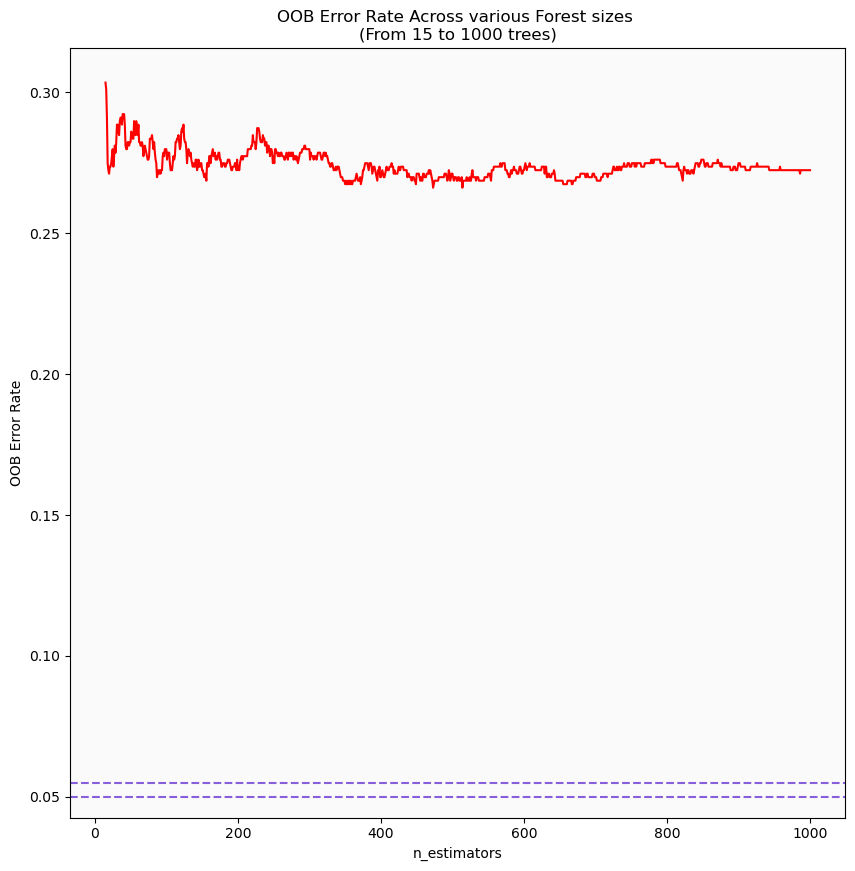

In [50]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.055, color='#875FDB',linestyle='--')
plt.axhline(0.05, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [51]:
print('OOB Error rate for 800 trees is: {0:.5f}'.format(oob_series[800]))

OOB Error rate for 800 trees is: 0.27363


In [52]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators=1000,
                  bootstrap = True,
                  
                  oob_score=False)

RandomForestClassifier(max_depth=12, max_features='auto', min_samples_split=12,
                       n_estimators=1000, random_state=42, warm_start=True)

### Train the dataset (Random forest)

In [53]:
fit_rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=12, max_features='auto', min_samples_split=12,
                       n_estimators=1000, random_state=42, warm_start=True)

In [54]:
Y_pred_rf=fit_rf.predict(X_test)
Y_pred_rf

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1])

In [55]:
Y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1])

In [56]:
accuracy_rf = fit_rf.score(X_test,Y_test)

print("accuracy on the test set:\n {0:.3f}".format(accuracy_rf))

accuracy on the test set:
 0.726


In [57]:
# Here we calculate the test error rate!
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.2736


## Confusion Matrix of  Random Forest Method

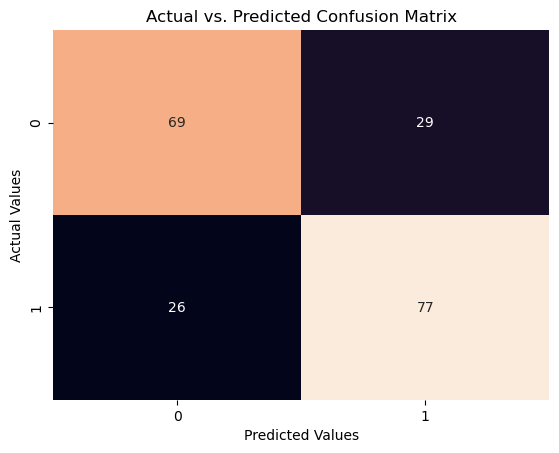

In [58]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Y_pred_rf,Y_test)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False,linecolor='black')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

## Classification Report

In [69]:
from sklearn.metrics import classification_report

print(f"RF:{classification_report(Y_test,Y_pred_rf)}")

RF:              precision    recall  f1-score   support

           0       0.70      0.73      0.72        95
           1       0.75      0.73      0.74       106

    accuracy                           0.73       201
   macro avg       0.73      0.73      0.73       201
weighted avg       0.73      0.73      0.73       201



## ROC Curve 

In [62]:
from sklearn.metrics import roc_curve, auc
predictions_prob = fit_rf.predict_proba(X_train)[:, 1]

fpr2, tpr2, _ = roc_curve(Y_test,
                          Y_pred_rf,
                          pos_label = 1)

In [63]:
auc_rf = auc(fpr2, tpr2)

In [65]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    * fpr: Array returned from sklearn.metrics.roc_curve for increasing
            false positive rates
    * tpr: Array returned from sklearn.metrics.roc_curve for increasing
            true positive rates
    * auc: Float returned from sklearn.metrics.auc (Area under Curve)
    * estimator: String represenation of appropriate model, can only contain the
    following: ['knn', 'rf', 'nn']
    * xlim: Set upper and lower x-limits
    * ylim: Set upper and lower y-limits
    """
    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'nn': ['Neural Network', 'purple']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

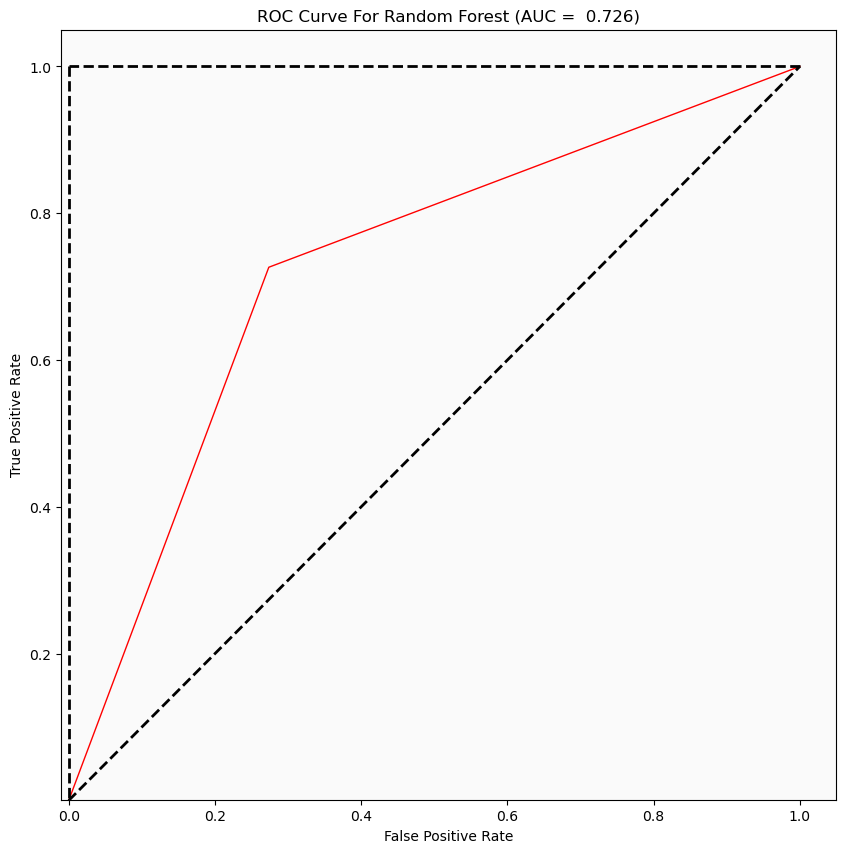

In [66]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

## Accuracy of logistic regression is 0.7412
## Accuracy of Multinomail logistic regression is  0.5970
## Decision Tree with Cart is Overfitting
## Accuracy of random forest classifier is  0.726